# 绘制学习曲线

+ ShuffleSplit 的文档里面可以找到学习曲线的画法实例。


In [1]:
import numpy as np

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 1, 2])

In [2]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=.5, random_state=0)
print(rs.get_n_splits())

10


In [3]:
for train_index, test_index in rs.split(X):
    print(train_index, test_index)

[1 0] [2 3]
[1 3] [0 2]
[2 1] [3 0]
[2 3] [1 0]
[3 0] [1 2]
[2 1] [0 3]
[2 3] [1 0]
[3 1] [0 2]
[0 1] [2 3]
[3 0] [2 1]


In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [5]:
# 是个等差数列
np.linspace(0.1, 1, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [6]:
def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(10, 8))
    plt.title("绘制学习曲线")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("训练数据集实例")
    plt.ylabel("得分 Score")

    train_size, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1, 5))

    # 因为要绘制影音，所以要计算平均值和方差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r")
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g")
    plt.plot(
        train_sizes,
        train_scores_mean,
        'o-',
        color="r",
        label="Training score")
    plt.plot(
        train_sizes,
        test_scores_mean,
        'o-',
        color="g",
        label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [7]:
from sklearn.naive_bayes import GaussianNB

digits = load_digits()

X = digits.data
y = digits.target

# 朴素贝叶斯的学习曲线
title = "Learning Curves (Naive Bayes)"

cv = ShuffleSplit(n_splits=100, test_size=.2, random_state=0)
estimator = GaussianNB()

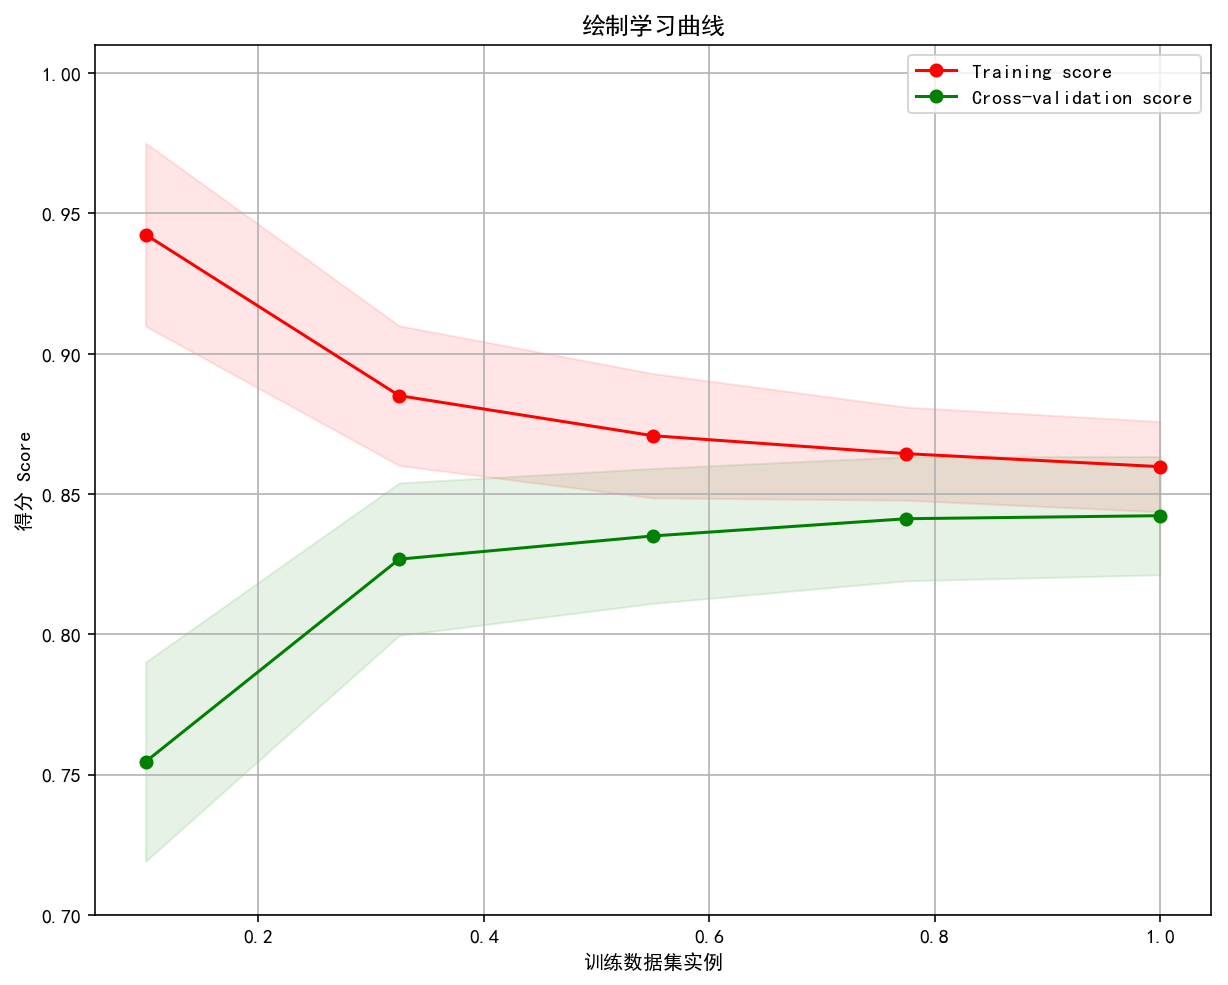

In [8]:
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

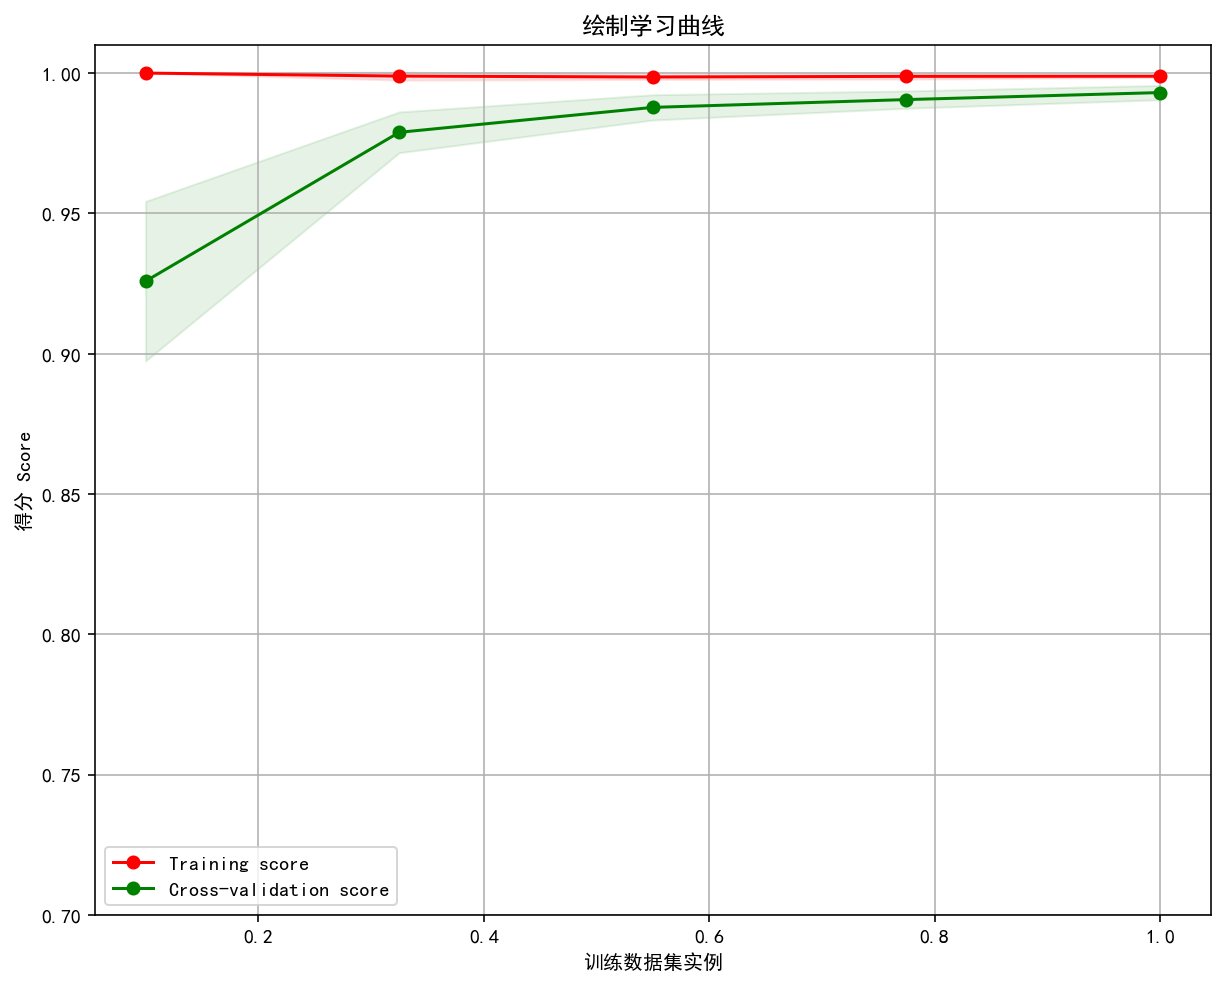

In [9]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

假正例：
$$FPR = \frac{FP}{FP + TN}$$

真正例（其实就是召回率）：
$$TPR = \frac{TP}{TP + FN}$$

In [10]:
import numpy as np
from sklearn import metrics

y = np.array([1, 1, 2, 2])
# score 表示每个测试样本属于正样本的概率。
scores = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

In [11]:
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [12]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [13]:
# 从大到小，scikit-learn 会给出一个它认为比较合理的取值
thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])